In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import csv 
import io
import pandas as pd
from pandas.compat import StringIO, BytesIO
import time #time.time() function to compute time

### Functions reading Nanonis files

In [57]:
def read_nanonis_experiment(filename):
    import pandas as pd
    with open(filename, "rb") as data_file:
        dummy_file = data_file.read()

        position = dummy_file.find(b'Experiment')
        data_file.seek(position)
        #data_type = data_file.readline().decode('ascii').split()[1:]
        data_type = data_file.readline().decode('ascii')[11:]
    return data_type

def read_nanonis_curve(filename):
    import pandas as pd
    with open(filename, "rb") as data_file:
        dummy_file = data_file.read()

        position = dummy_file.find(b'[DATA]')
        data_file.seek(position)
        data_file.readline()
        data_table = data_file.read().decode('ascii')
    curve=pd.read_csv(StringIO(data_table), sep='\t')
    return curve

#### Parameters and file names

In [58]:
n0 = 200; nfiles = 2;
file_folder = './RawData';
file_name_root = 'Z-Spectroscopy';
file_name_ext = '.dat';
file_name_z = [];
for i in range(nfiles):
    name_string = file_folder + '/' + file_name_root + str('%05d' % (i+n0)) + file_name_ext
    file_name_z.append(name_string)
    
file_name_z

['./RawData/Z-Spectroscopy00200.dat', './RawData/Z-Spectroscopy00201.dat']

In [59]:
z_disp = [];
defl_fwd = [];
defl_bwd = [];
for n in range(nfiles): 
    with open(file_name_z[n], "rb") as data_file:
        #string = b'[DATA]'
        dummy_file = data_file.read()
        #print(file)

        
        position = dummy_file.find(b'[DATA]')
        data_file.seek(position)
        data_file.readline()
        data_table = data_file.read().decode('ascii')
    db = pd.read_csv(StringIO(data_table), sep='\t')
    z_disp.append(db['Z rel (m)'])
    defl_fwd.append(db['Vert. Deflection (V)'])
    defl_bwd.append(db['Vert. Deflection [bwd] (V)'])

In [60]:
db.head()

,Z rel (m),Vert. Deflection (V),OC D1 Amplitude (m),OC M1 Freq. Shift (Hz),Vert. Deflection [bwd] (V),OC D1 Amplitude [bwd] (m),OC M1 Freq. Shift [bwd] (Hz)
0,1.000000e-08,0.157035,4.910132e-09,-35.915916,0.158931,7.922613e-11,130.239170
1,9.862745e-09,0.156857,4.927856e-09,-33.642815,0.159945,7.272767e-11,152.587890
2,9.725490e-09,0.156914,4.935240e-09,-32.565506,0.159785,1.889429e-10,152.587890
3,9.588235e-09,0.156579,4.947882e-09,-26.026943,0.158888,1.955723e-10,152.587890
4,9.450980e-09,0.156461,4.955342e-09,-34.001934,0.159746,8.644337e-11,-36.821781


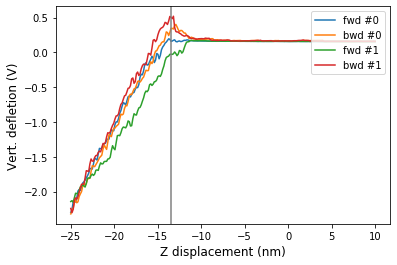

In [98]:
#mpl.style.use('default') #set style for plots (default, classic, seaborn-colorblind)
for i in range(nfiles):
    plt.plot(z_disp[i]*1e9, defl_fwd[i], label = 'fwd #'+str(i));
    plt.plot(z_disp[i]*1e9, defl_bwd[i], label = 'bwd #'+str(i));

plt.xlabel('Z displacement (nm)', fontsize = 12)
plt.ylabel('Vert. defletion (V)', fontsize = 12)
plt.axvline(x=-1.35e-8*1e9,color='gray')
plt.legend(ncol = 1, loc = 'upper right', fontsize = 10)

#plt.axis([-350,560,0,1.1])
#plt.tick_params(labelsize = 12, left = 'off', labelleft = 'off')
#plt.legend(ncol = 2, loc = 'upper right', fontsize = 10)
plt.show()

#### Static optical sensitivity 
It calculates the **static optical sensitivity** from a F-d curve

Static optical sensitivity:  0.2 V/nm
Static optical calibration:  4.93 nm/V


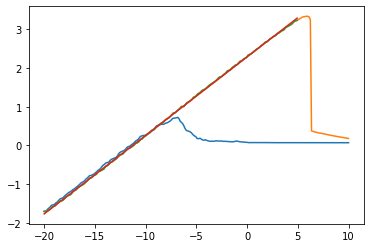

In [141]:
file_name = './RawData/Z-Spectroscopy00195.dat'
with open(file_name, "rb") as data_file:
    #string = b'[DATA]'
    dummy_file = data_file.read()
    #print(file)

        
    position = dummy_file.find(b'[DATA]')
    data_file.seek(position)
    data_file.readline()
    data_table = data_file.read().decode('ascii')
db = pd.read_csv(StringIO(data_table), sep='\t')
z_disp = db['Z rel (m)']
defl_fwd = db['Vert. Deflection (V)']
defl_bwd = db['Vert. Deflection [bwd] (V)']

ind = z_disp < 5*1e-9;


xdata = z_disp[ind]
ydata = defl_bwd[ind]

x = np.array(xdata).reshape((-1,1))
y = np.array(ydata)

model = LinearRegression()
model.fit(x,y)

#print(model.intercept_, model.coef_)
print('Static optical sensitivity: ', round(model.coef_[0]/1e9,2), 'V/nm')
print('Static optical calibration: ', round(1e9/model.coef_[0],2), 'nm/V')

plt.plot(z_disp*1e9, defl_fwd, label = 'fwd');
plt.plot(z_disp*1e9, defl_bwd, label = 'bwd');
plt.plot(x*1e9, y, label = 'fwd #'+str(i))
plt.plot(x*1e9, model.predict(x))
plt.show()

In [131]:
db[db['Z rel (m)']<0].head()

,Z rel (m),Vert. Deflection (V),OC D1 Amplitude (m),OC M1 Freq. Shift (Hz),Vert. Deflection [bwd] (V),OC D1 Amplitude [bwd] (m),OC M1 Freq. Shift [bwd] (Hz)
73,-1.960832e-11,0.157373,4.944843e-09,-67.342552,0.161219,3.453646e-11,94.090393
74,-1.568630e-10,0.157119,4.933208e-09,-81.644501,0.163439,5.163214e-11,134.519590
75,-2.941176e-10,0.157802,4.912555e-09,-93.170227,0.162400,7.760537e-11,152.587890
76,-4.313723e-10,0.157466,4.894645e-09,-83.213905,0.162585,2.179591e-11,118.775650
77,-5.686278e-10,0.157395,4.885107e-09,-87.332153,0.162654,9.352908e-11,152.587890
